# Pandas

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
# reading data in csv(comma separeated files)

df = pd.read_csv('olympics.csv',skiprows=4)

df.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29216 entries, 0 to 29215
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   City          29216 non-null  object
 1   Edition       29216 non-null  int64 
 2   Sport         29216 non-null  object
 3   Discipline    29216 non-null  object
 4   Athlete       29216 non-null  object
 5   NOC           29216 non-null  object
 6   Gender        29216 non-null  object
 7   Event         29216 non-null  object
 8   Event_gender  29216 non-null  object
 9   Medal         29216 non-null  object
dtypes: int64(1), object(9)
memory usage: 2.2+ MB


In [4]:
# checking the size of the columns and rows 
df.shape[0]

29216

In [5]:
df.Sport.value_counts().tail()

Sport
Croquet              8
Water Motorsports    5
Basque Pelota        4
Jeu de paume         3
Roque                3
Name: count, dtype: int64

In [6]:
# using boolean to find results

df_men = df[(df.Medal == 'Bronze') & (df.Gender == 'Men')]

df_men['City'].value_counts()

City
Los Angeles              514
London                   442
Athens                   416
Paris                    406
Barcelona                391
Beijing                  391
Sydney                   386
Atlanta                  374
Seoul                    352
Antwerp                  341
Munich                   336
Moscow                   328
Montreal                 321
Tokyo                    282
Mexico                   281
Stockholm                274
Berlin                   254
Rome                     254
Helsinki                 253
Melbourne / Stockholm    248
Amsterdam                210
St Louis                 121
Name: count, dtype: int64

In [7]:
# Uisng Strings to find something

df[(df.Athlete.str.contains('Florence') & (df.Medal == 'Gold'))]

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
1843,London,1908,Skating,Figure skating,"SYERS, Florence",GBR,Women,individual,W,Gold
18287,Seoul,1988,Athletics,Athletics,"GRIFFITH-JOYNER, Florence",USA,Women,100m,W,Gold
18305,Seoul,1988,Athletics,Athletics,"GRIFFITH-JOYNER, Florence",USA,Women,200m,W,Gold
18347,Seoul,1988,Athletics,Athletics,"GRIFFITH-JOYNER, Florence",USA,Women,4x100m relay,W,Gold


In [10]:
# At which event did jesse Owens win medal
js = df[df.Athlete.str.contains('OWENS, Jesse')]

js

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
6427,Berlin,1936,Athletics,Athletics,"OWENS, Jesse",USA,Men,100m,M,Gold
6439,Berlin,1936,Athletics,Athletics,"OWENS, Jesse",USA,Men,200m,M,Gold
6456,Berlin,1936,Athletics,Athletics,"OWENS, Jesse",USA,Men,4x100m relay,M,Gold
6523,Berlin,1936,Athletics,Athletics,"OWENS, Jesse",USA,Men,long jump,M,Gold


In [11]:
js.Event.value_counts()

Event
100m            1
200m            1
4x100m relay    1
long jump       1
Name: count, dtype: int64

In [16]:
# Highest number of Gold medals in Athetics in Men's catergory, per countries

best_city = df[(df.Medal == 'Gold') & (df.Discipline == 'Athletics') & (df.Gender == 'Men')]

best_city.NOC.value_counts().head(10)

NOC
USA    379
FIN     59
GBR     54
URS     43
KEN     23
SWE     19
ITA     16
CAN     15
POL     15
GDR     14
Name: count, dtype: int64

# MAtplotlib 

In [23]:
# different sport in first olympics

fo =df[df.Edition == 1896]

fo.Sport.value_counts()

Sport
Gymnastics       45
Athletics        37
Cycling          16
Shooting         15
Aquatics         11
Tennis           10
Fencing           8
Weightlifting     6
Wrestling         3
Name: count, dtype: int64

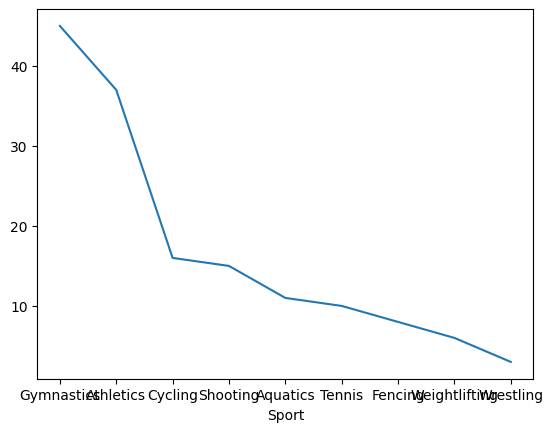

In [26]:
fo.Sport.value_counts().plot(kind='line');

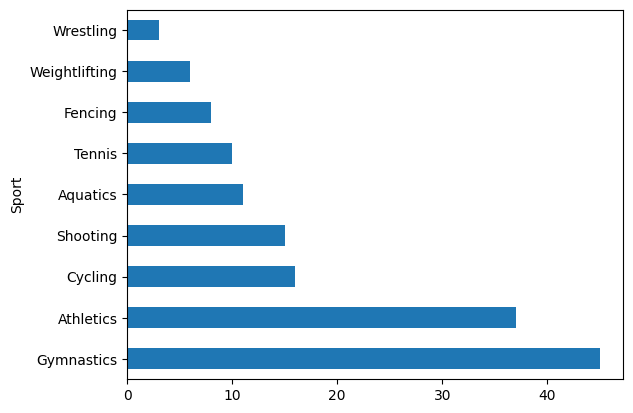

In [28]:
fo.Sport.value_counts().plot(kind='barh');

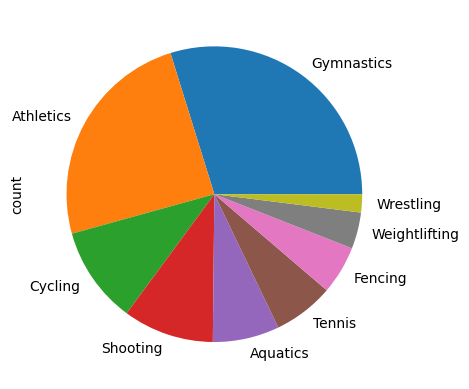

In [29]:
fo.Sport.value_counts().plot(kind='pie');

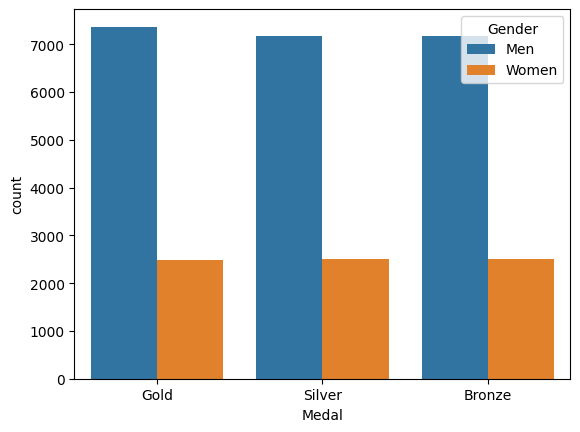

In [39]:
# distribution of men and women on gold medals
sns.countplot(x='Medal', data=df, hue='Gender');

In [50]:
chnGW = df[(df.NOC == 'CHN') & (df.Edition == 2008)]

chnGW

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
27176,Beijing,2008,Aquatics,Diving,"ZHOU, Luxin",CHN,Men,10m platform,M,Silver
27177,Beijing,2008,Aquatics,Diving,"WANG, Xin",CHN,Women,10m platform,W,Bronze
27178,Beijing,2008,Aquatics,Diving,"CHEN, Ruolin",CHN,Women,10m platform,W,Gold
27180,Beijing,2008,Aquatics,Diving,"QIN, Kai",CHN,Men,3m springboard,M,Bronze
27181,Beijing,2008,Aquatics,Diving,"HE, Chong",CHN,Men,3m springboard,M,Gold
...,...,...,...,...,...,...,...,...,...,...
29138,Beijing,2008,Weightlifting,Weightlifting,"LI, Hongli",CHN,Men,77kg,M,Silver
29140,Beijing,2008,Weightlifting,Weightlifting,"LU, Yong",CHN,Men,85kg,M,Gold
29156,Beijing,2008,Wrestling,Wrestling Free.,"XU, Li",CHN,Women,48 - 55kg,W,Silver
29171,Beijing,2008,Wrestling,Wrestling Free.,"WANG, Jiao",CHN,Women,63 - 72kg,W,Gold


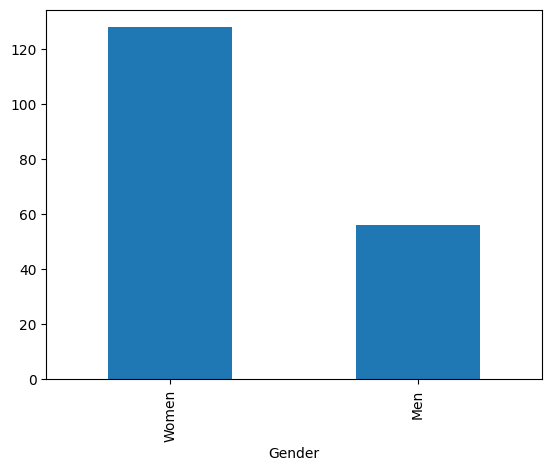

In [53]:
chnGW.Gender.value_counts().plot(kind='bar');

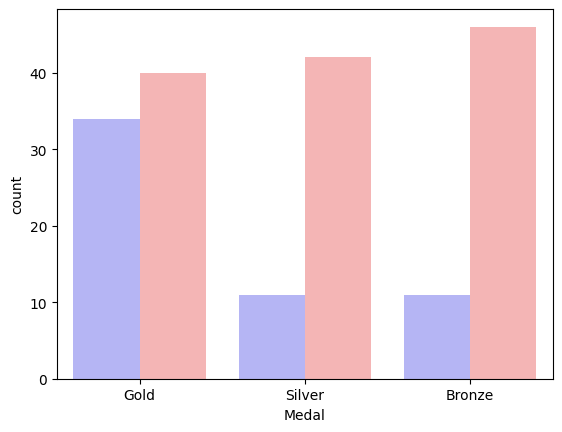

In [59]:
sns.countplot(data=chnGW, x = 'Medal',hue='Gender', palette='bwr',legend=False, order=['Gold', 'Silver','Bronze']);

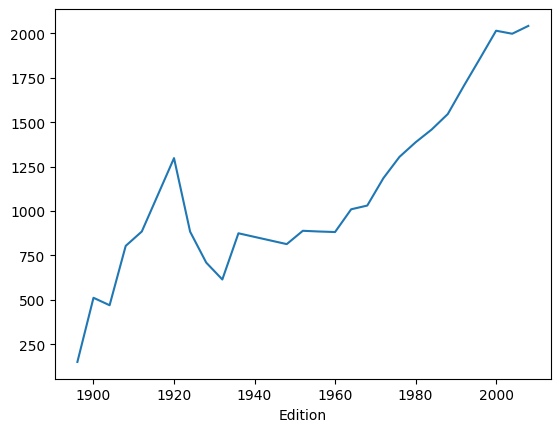

In [64]:
df.Edition.value_counts().sort_index().plot();

In [6]:
# sorting and index- sorting by the index 

df.sort_values('Sport', ascending=True).head()



,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
7221,London,1948,Aquatics,Swimming,"ZIMMERMAN, Suzanne Winona",USA,Women,100m backstroke,W,Silver
7220,London,1948,Aquatics,Swimming,"HARUP, Karen Margrethe",DEN,Women,100m backstroke,W,Gold
7219,London,1948,Aquatics,Swimming,"DAVIES, Judith Joy",AUS,Women,100m backstroke,W,Bronze
7218,London,1948,Aquatics,Swimming,"COWELL, Robert Elmer",USA,Men,100m backstroke,M,Silver


In [8]:
# LOC[]

name = df[df.Athlete == 'BOLT, Usain']

name

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
27552,Beijing,2008,Athletics,Athletics,"BOLT, Usain",JAM,Men,100m,M,Gold
27570,Beijing,2008,Athletics,Athletics,"BOLT, Usain",JAM,Men,200m,M,Gold
27603,Beijing,2008,Athletics,Athletics,"BOLT, Usain",JAM,Men,4x100m relay,M,Gold


In [12]:
df.iloc[1:4]

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold


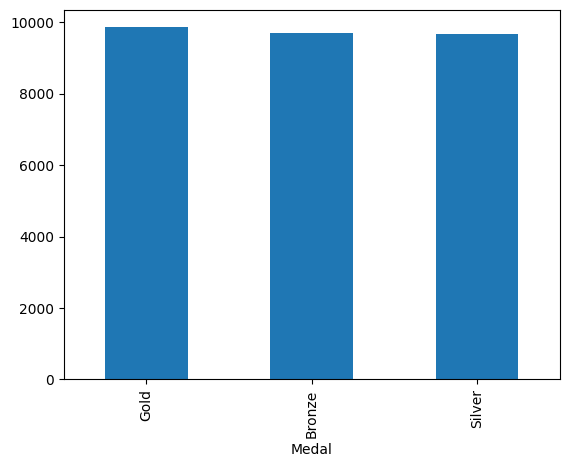

In [37]:
# medals awarded at each olympic game 

df.Medal.value_counts().plot(kind='bar');

In [30]:
# which country did not win olympics in 2008

gold_2008 = df[(df.Edition == 2008) & ((df.Medal == 'Gold' ) & (df.Medal != 'Bronze') & (df.Medal !=  'Silver'))]

gold_2008.NOC.value_counts().head(4)

NOC
USA    125
CHN     74
RUS     43
GER     42
Name: count, dtype: int64

In [35]:
df[df.NOC == 'KEN']

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
10897,Tokyo,1964,Athletics,Athletics,"KIPRUGUT, Wilson Chuma",KEN,Men,800m,M,Bronze
11862,Mexico,1968,Athletics,Athletics,"TEMU, Nabiba Naftali",KEN,Men,10000m,M,Gold
11874,Mexico,1968,Athletics,Athletics,"KEINO, Kipchoge",KEN,Men,1500m,M,Gold
11886,Mexico,1968,Athletics,Athletics,"BIWOTT, Amos Kipwabok",KEN,Men,3000m steeplechase,M,Gold
11887,Mexico,1968,Athletics,Athletics,"KOGO, Benjamin",KEN,Men,3000m steeplechase,M,Silver
...,...,...,...,...,...,...,...,...,...,...
27657,Beijing,2008,Athletics,Athletics,"BUNGEI, Wilfred",KEN,Men,800m,M,Gold
27660,Beijing,2008,Athletics,Athletics,"JELIMO, Pamela",KEN,Women,800m,W,Gold
27661,Beijing,2008,Athletics,Athletics,"BUSIENEI, Janeth Jepkosgei",KEN,Women,800m,W,Silver
27699,Beijing,2008,Athletics,Athletics,"WANSIRU, Samuel Kamau",KEN,Men,marathon,M,Gold
